In [2]:
import torch
import cv2

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.image as mpimg
from matplotlib import font_manager, rc
rc('font',family="AppleGothic")
plt.rcParams["font.family"]="AppleGothic" #plt 한글꺠짐
plt.rcParams["font.family"]="Arial" #외국어꺠짐
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
plt.rc('figure', figsize=(10,8))

sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid') #sns 한글깨짐


torch.cuda.is_available()

c:\Users\user\anaconda3\envs\yolov7\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [3]:
def show(img):
    #사이즈
    plt.figure(figsize = (10,8))
    #xticks/yticks - 눈금표
    plt.xticks([])
    plt.yticks([])
    #코랩에서 안돌아감 주의
    plt.imshow(img, cmap= 'gray')
    plt.show()

def vid_info(path, codec, name, fps):
    cap = cv2.VideoCapture(path)
    print(cap)
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)

    #재생할 파일의 높이 얻기
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    #재생할 파일의 프레임 레이트 얻기
    # fps = cap.get(cv2.CAP_PROP_FPS)
    
    #codec
    fourcc = cv2.VideoWriter_fourcc(*codec)
    
    #filename
    filename = name+'.mp4'
    
    #out 
    out = cv2.VideoWriter(filename, fourcc, fps, (int(width), int(height)))
    
    print('cap {0}, width {1}, height {2}, fps {3}'.format(cap, width, height, fps))
    print('codec {0}', 'filename {1}'.format(fourcc, filename))
    
    return cap, width, height, fps, fourcc, filename, out


In [10]:
 !python detect.py --weights best_v1.pt --conf 0.4 --source C:\Users\yukir\Documents\Monicas_workspace\train_diff\test_set\basic.mp4

python: can't open file 'detect.py': [Errno 2] No such file or directory


In [11]:
%cd C:\Users\yukir\Documents\Monicas_workspace\train_diff\workspace


[WinError 3] 지정된 경로를 찾을 수 없습니다: 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\train_diff\\workspace'
c:\Users\user\Documents\train_diff\workspace


### VIDEO CUT

In [12]:
cap = cv2.VideoCapture("C:\\Users\\user\\Documents\\train_diff\\org\\testing_vid\\post.mp4")

#재생할 파일의 넓이 얻기
width = 680

#재생할 파일의 높이 얻기
height = 1080
#재생할 파일의 프레임 레이트 얻기
fps = cap.get(cv2.CAP_PROP_FPS)

print('width {0}, height {1}, fps {2}'.format(width, height, fps))

#저장할 비디오 코덱
fourcc = cv2.VideoWriter_fourcc(*'XVID')
#저장할 파일 이름
filename = 'croped_post.mp4'

# #파일 stream 생성
out = cv2.VideoWriter(filename, fourcc, fps, (int(width), int(height)))

frame_length = []
while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    frame = frame[0:1080, 630:1310].copy()
    # print(frame.shape)
    cv2.imshow('frame', frame)
    out.write(frame)
    frame_length.append(frame)
    if cv2.waitKey(30) == 27:
        break
cap.release()
out.release()
cv2.destroyAllWindows()

width 680, height 1080, fps 29.97002997002997


KeyboardInterrupt: 

### Find Starting Point & listing_img

In [79]:
cap = cv2.VideoCapture("C:\\Users\\user\\Documents\\train_diff\\org\\testing_vid\\basic.mp4")

#재생할 파일의 넓이 얻기
width = 680

#재생할 파일의 높이 얻기
height = 1080
#재생할 파일의 프레임 레이트 얻기
fps = cap.get(cv2.CAP_PROP_FPS) 

print('width {0}, height {1}, fps {2}'.format(width, height, fps))

#저장할 비디오 코덱
fourcc = cv2.VideoWriter_fourcc(*'XVID')
#저장할 파일 이름
filename = 'detection_result_test.mp4'

# #파일 stream 생성
out = cv2.VideoWriter(filename, fourcc, fps, (int(width), int(height)))
# out = cv2.VideoWriter(filename, fourcc, fps, (int(width), int(height)))


if not cap.isOpened():
    print('Video open failed!')
    sys.exit()

# 배경 영상 등록
ret, back = cap.read()
back = back[0:1080, 630:1310].copy()
back_org = back.copy()
if not ret:
    print('Background image registration failed!')
    sys.exit()
    
# 연산 속도를 높이기 위해 그레이스케일 영상으로 변환
back = cv2.cvtColor(back, cv2.COLOR_BGR2GRAY)

# 가우시안 블러로 노이즈 제거 (모폴로지, 열기, 닫기 연산도 가능)
back = cv2.GaussianBlur(back, (0, 0), 1.0)

# 비디오 매 프레임 처리
test_list =[]
img_list = []
frame_num = 0 

while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    frame = frame[0:1080, 630:1310].copy()
    frame_org = frame.copy()
    img_list.append(frame)

    frame_num +=1 
    # 현재 프레임 영상 그레이스케일 변환
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # 노이즈 제거
    gray = cv2.GaussianBlur(gray, (0, 0), 1.0)
    
    # 차영상 구하기 $ 이진화
    # absdiff는 차 영상에 절대값
    diff = cv2.absdiff(gray, back)
    # gray_mean() or 밝기정도 지정 가능
    ####!!!!!back.mean()으로 하면 smoke까지 가능?
    _, diff = cv2.threshold(diff, 70, 255, cv2.THRESH_BINARY)
    
    # 레이브링을 이용하여 바운딩 박스 표시
    cnt, _, stats, _ = cv2.connectedComponentsWithStats(diff)
    
    #contour
#     dilated = cv2.dilate(diff, None, iteration=3)

    contours, _ = cv2.findContours(diff, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for i in range(1, cnt):
        x, y, w, h, s = stats[i]
        
        if s < 100:
            continue

       
        test_list.append(frame_num)
       
    cv2.imshow('frame', frame)
    out.write(frame)

    if cv2.waitKey(30) == 27:
        break
    

cap.release()
out.release()
cv2.destroyAllWindows()

width 680, height 1080, fps 29.97002997002997


### Still cut

719
346
6


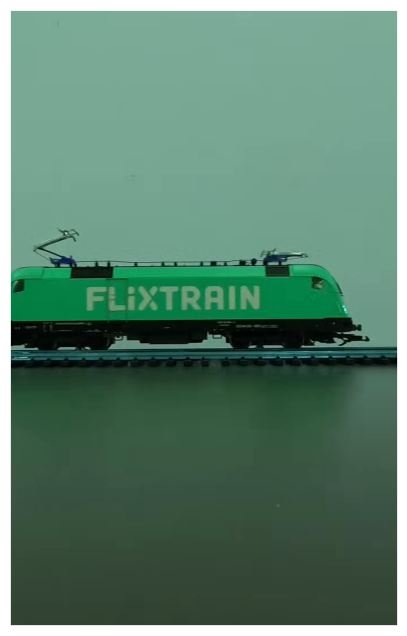

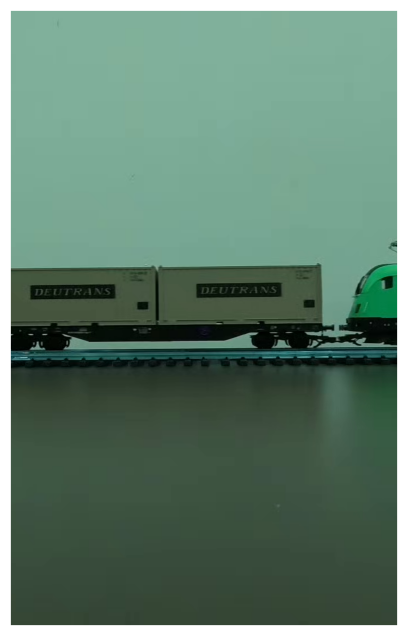

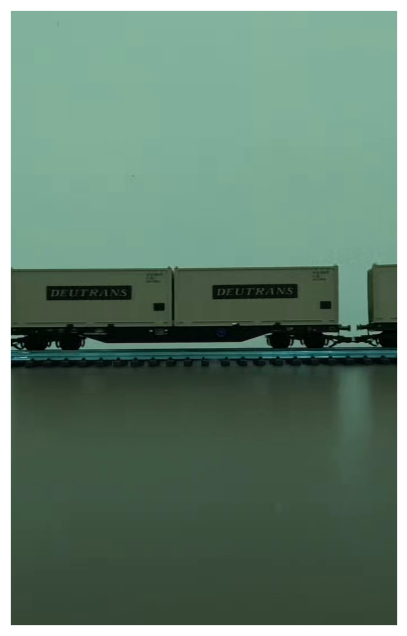

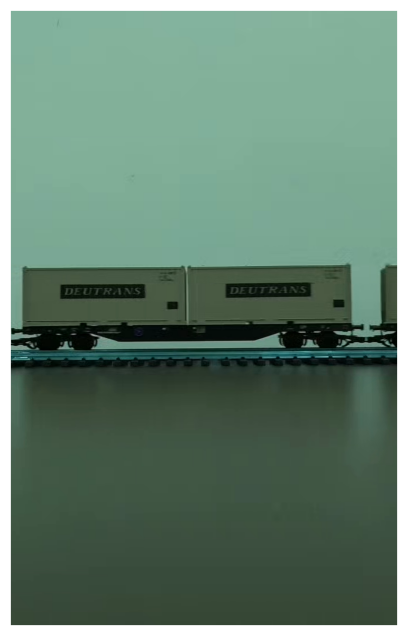

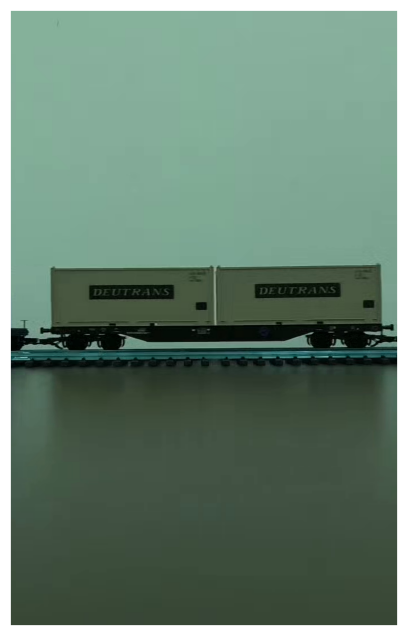

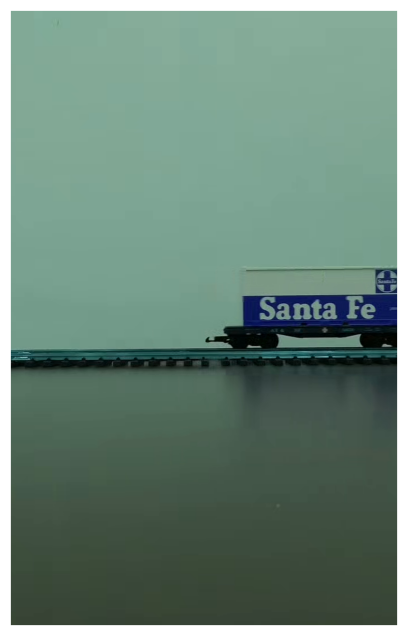

In [80]:
## basic

frame_length = len(img_list)
starting_point = test_list[0]

print(frame_length)
print(starting_point)

crop_img = []
starting_point = starting_point-6
while True:
    # crop_img.append(img_list[starting_point])
    starting_point+=55
    try:
        crop_img.append(img_list[starting_point])
        # cv2.imwrite('basic_{}.jpg'.format(starting_point), img_list[starting_point])
        if starting_point>= frame_length:
            break
    except:
        break
print(len(crop_img))

for i in crop_img:
    show(i)

In [ ]:
## post

frame_length = len(img_list)
starting_point = test_list[0]

print(frame_length)
print(starting_point)

crop_img = []

while True:
    # crop_img.append(img_list[starting_point])
    starting_point+=61
    try:
        crop_img.append(img_list[starting_point])
        cv2.imwrite('post_{}.jpg'.format(starting_point), img_list[starting_point])
        if starting_point>= frame_length:
            break
    except:
        break

print(len(crop_img))

In [74]:
## add

frame_length = len(img_list)
starting_point = test_list[0]

print(frame_length)
print(starting_point)

crop_img = []

while True:
    # crop_img.append(img_list[starting_point])
    starting_point+=65
    try:
        crop_img.append(img_list[starting_point])
        cv2.imwrite('add_{}.jpg'.format(starting_point), img_list[starting_point])
        if starting_point>= frame_length:
            break
    except:
        break

print(len(crop_img))

# for i in crop_img:
#     show(i)

743
237
7


In [78]:
## loc

frame_length = len(img_list)
starting_point = test_list[0]

print(frame_length)
print(starting_point)

crop_img = []

while True:
    # crop_img.append(img_list[starting_point])
    starting_point+=65
    try:
        crop_img.append(img_list[starting_point])
        cv2.imwrite('location_{}.jpg'.format(starting_point), img_list[starting_point])
        if starting_point>= frame_length:
            break
    except:
        break

print(len(crop_img))

# for i in crop_img:
#     show(i)

734
241
7


### image stiching

https://broscoding.tistory.com/421

In [83]:
len(crop_img)

6

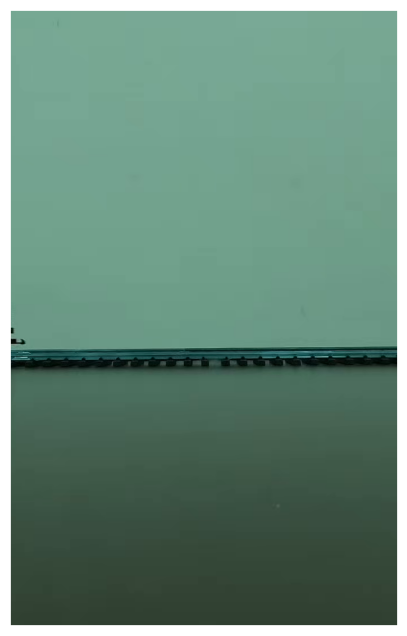

In [ ]:
show(test_list[0])